In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
# Import the rdatasets package
from rdatasets import data as rdata

In [2]:
data = sm.datasets.get_rdataset("mtcars", "datasets").data

# Display dataset information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB
None


In [3]:
X = sm.add_constant(data['hp'])  # Add constant for intercept
y = data['mpg']

# Ensure that X and y have consistent dimensions
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (32, 2), y shape: (32,)


In [4]:
# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           1.79e-07
Time:                        17:34:57   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0989      1.634     18.421      0.0

In [5]:
# Define the target horsepower value
target_hp = 150
# Create a DataFrame with the target horsepower and add a constant term
target_X = pd.DataFrame({'hp': [target_hp]})
target_X = sm.add_constant(target_X, has_constant='add')  # Explicitly add constant

# Get the confidence interval for the mean predicted value
mean_prediction = model.get_prediction(target_X).summary_frame(alpha=0.05)
print(mean_prediction[['mean', 'mean_ci_lower', 'mean_ci_upper']])

        mean  mean_ci_lower  mean_ci_upper
0  19.864619      18.468309      21.260928


In [6]:
# Get the prediction interval for an individual observation
prediction = model.get_prediction(target_X).summary_frame(alpha=0.05)
print(prediction[['mean', 'obs_ci_lower', 'obs_ci_upper']])

        mean  obs_ci_lower  obs_ci_upper
0  19.864619     11.852784     27.876453


KeyError: 'Predicted_mpg'

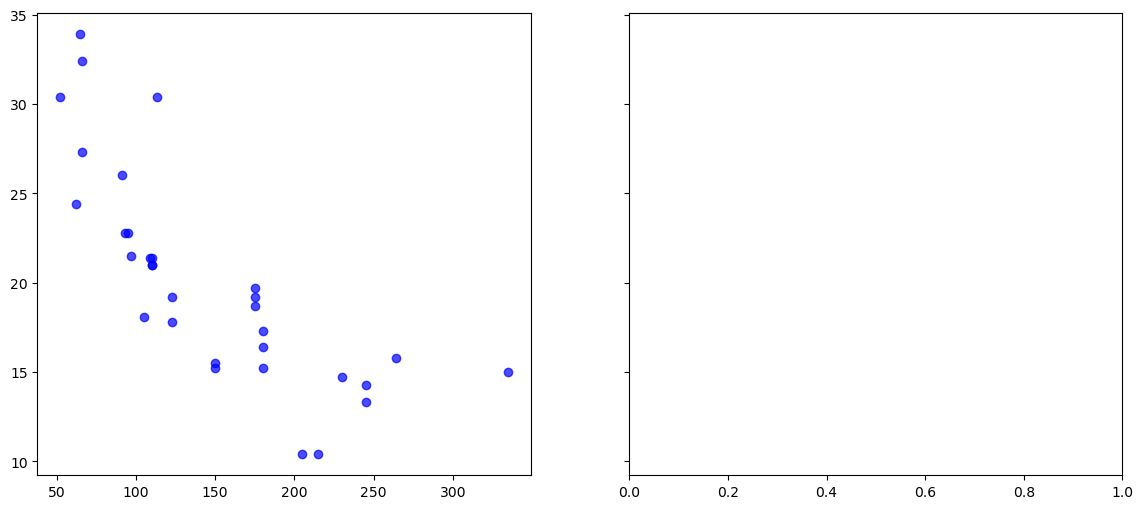

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

#Scatterplot with confidence intervals
axes[0].scatter(data['hp'], data['mpg'], label='Data', color='blue', alpha=0.7)
axes[0].plot(data['hp'], data['Predicted_mpg'], color='red', label='Regression Line')
axes[0].fill_between(data['hp'], data['mean_ci_lower'], data['mean_ci_upper'], color='gray', alpha=0.3, label='Confidence Interval (Mean)')
axes[0].set_title('Confidence Intervals for the Mean')
axes[0].set_xlabel('Horsepower (hp)')
axes[0].set_ylabel('Miles Per Gallon (mpg)')
axes[0].legend()


# Scatterplot with prediction intervals
axes[1].scatter(data['hp'], data['mpg'], label='Data', color='blue', alpha=0.7)
axes[1].plot(data['hp'], data['Predicted_mpg'], color='red', label='Regression Line')
axes[1].fill_between(data['hp'], data['obs_ci_lower'], data['obs_ci_upper'], color='orange', alpha=0.3, label='Prediction Interval')
axes[1].set_title('Prediction Intervals for a Single Observation')
axes[1].set_xlabel('Horsepower (hp)')
axes[1].legend()


plt.tight_layout()
plt.show()